In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
#DATA_DIR=Path("final_cleaned")
patients_file="patients_cleaned_file.csv"
demographics_file="demographics_cleaned.csv"

In [18]:
final_df=pd.read_csv(patients_file, parse_dates=["DateTime"],dtype={"Patient_ID":"string"})
demographics=pd.read_csv(demographics_file,dtype={"Patient_ID": "string","Gender":"string","Race":"string"}) 
print(final_df.head())
print(demographics.head())
final_df.dtypes

             DateTime  Glucose(mg/dL)  Calories  Heart Rate(BPM)  Steps  \
0 2018-06-13 18:40:00             332       6.4               82     34   
1 2018-06-13 18:45:00             326       7.7               83      0   
2 2018-06-13 18:50:00             330       4.7               80      0   
3 2018-06-13 18:55:00             324       6.4               89     20   
4 2018-06-13 19:00:00             306       5.2               92      0   

   Basal Rate(units/hour)  Bolus Volume Delivered(units)  Carb Intake (grams)  \
0                   0.092                            0.0                    0   
1                   0.092                            0.0                    0   
2                   0.092                            0.0                    0   
3                   0.092                            0.0                    0   
4                   0.075                            0.0                    0   

  Patient_ID  
0  HUPA0001P  
1  HUPA0001P  
2  HUPA0001P  
3 

DateTime                         datetime64[ns]
Glucose(mg/dL)                            int64
Calories                                float64
Heart Rate(BPM)                           int64
Steps                                     int64
Basal Rate(units/hour)                  float64
Bolus Volume Delivered(units)           float64
Carb Intake (grams)                       int64
Patient_ID                       string[python]
dtype: object

## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:25px;"><b>Q1. What is the distribution of glucose levels across all patients, and how does it vary by age and gender?
</b></div>

<div style="color:black; font-size:20px;font-family:'Arial'; margin-bottom:0px;">
    
<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>

Why these markers:
Glucose is the primary biomarker for diabetes diagnosis and management.
Age affects insulin sensitivity and metabolic rate.
Gender influences hormonal regulation and diabetes risk profiles.

Clinical importance:
Understanding how glucose varies across age and gender helps identify high-risk groups, tailor treatment plans, and uncover demographic disparities in glycemic control.
</div>


Merged shape: (309392, 15)
     Age_Group  Gender   Count
0        Young  Female   13214
1        Young    Male   50539
2  Middle-aged  Female       0
3  Middle-aged    Male   31635
4       Senior  Female  180475
5       Senior    Male   33529


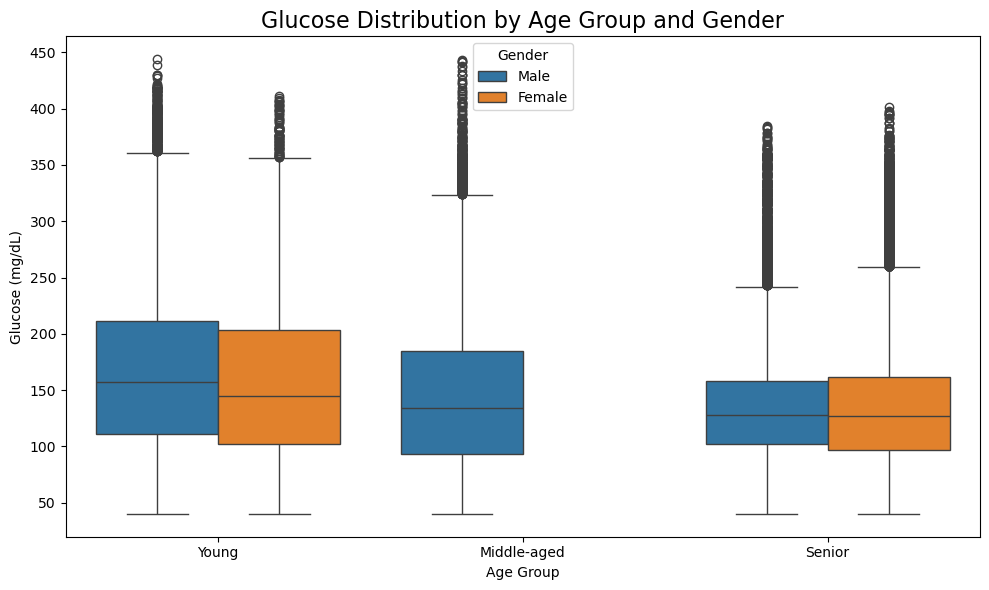

In [20]:
#merge(INNER_JOIN since all patients have demographics)
df=pd.merge(
    final_df,
    demographics,
    on="Patient_ID",
    how="inner"
)
print("Merged shape:", df.shape)
#print("first 3 rows:",df.head(3))


# Define bins and labels
age_bins = [0, 35, 60, 100]
age_labels = ['Young', 'Middle-aged', 'Senior']

# Create a new column for age group
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Optional: check distribution
# Count number of patients in each Age_Group and Gender
age_gender_counts = df.groupby(['Age_Group', 'Gender']).size().reset_index(name='Count')

print(age_gender_counts)

plt.figure(figsize=(10,6))

# Custom gender colors
gender_palette = {"Male": "#1f77b4", "Female": "#ff7f0e"}

# Boxplot: glucose by age group, colored by gender
sns.boxplot(x="Age_Group", y="Glucose(mg/dL)", hue="Gender", data=df, palette=gender_palette)

plt.title("Glucose Distribution by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Glucose (mg/dL)")
plt.legend(title="Gender")
plt.tight_layout()

plt.show()


## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q2. How does average sleep duration and sleep quality differ across racial and gender groups?</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>

Why these markers:
Sleep Duration & Quality affect insulin sensitivity, cortisol levels, and glucose metabolism.
Race & Gender are associated with disparities in sleep patterns and diabetes outcomes.

Clinical importance: Poor sleep is linked to increased risk of Type 2 diabetes. Analyzing these markers helps uncover behavioral contributors to metabolic dysfunction and supports personalized lifestyle interventions.

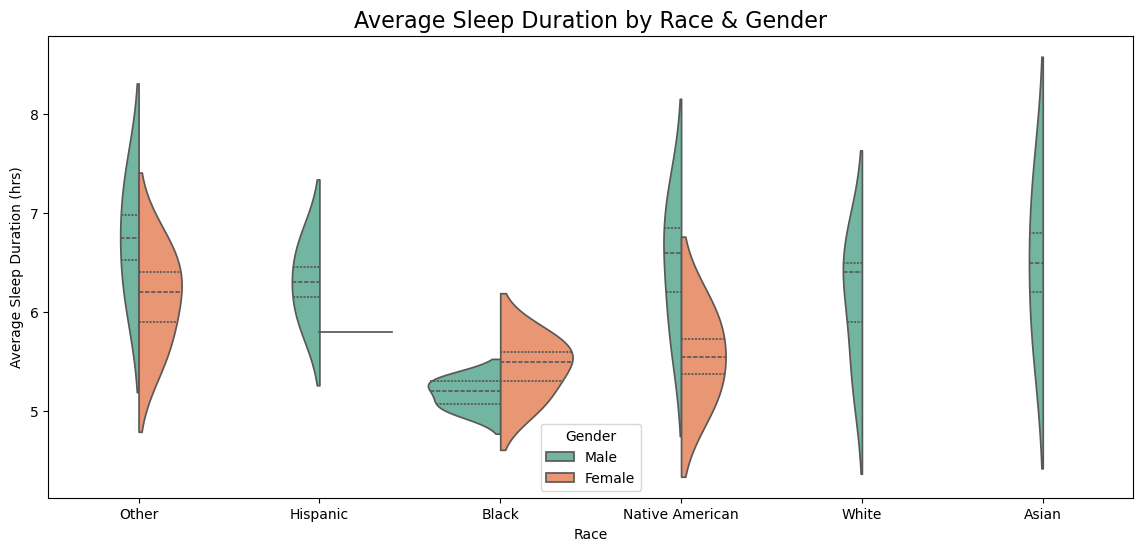

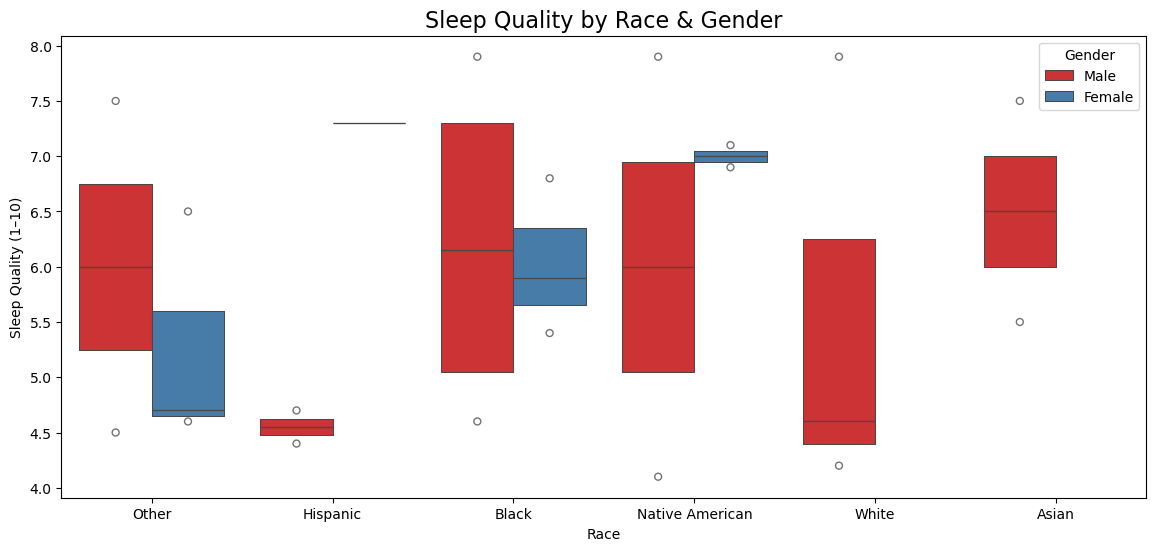

In [22]:
# Violin plot with split gender, grouped by race
plt.figure(figsize=(14,6))
sns.violinplot(
    data=demographics,
    x="Race",
    y="Average Sleep Duration (hrs)",
    hue="Gender",
    split=True,
    inner="quartile",
    palette="Set2"
)
plt.title("Average Sleep Duration by Race & Gender", fontsize=16)
plt.ylabel("Average Sleep Duration (hrs)")
plt.xlabel("Race")
plt.legend(title="Gender")
plt.show()

# Sleep Quality version
plt.figure(figsize=(14,6))
sns.boxenplot(
    data=demographics,
    x="Race",
    y="Sleep Quality (1-10)",
    hue="Gender",
    palette="Set1"
)
plt.title("Sleep Quality by Race & Gender", fontsize=16)
plt.ylabel("Sleep Quality (1–10)")
plt.xlabel("Race")
plt.legend(title="Gender")
plt.show()

## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q3. Is there a correlation between physical activity and glucose levels?</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>

Why these markers:
Steps & Calories measure physical activity.
Glucose reflects metabolic response to that activity.

Clinical importance: Physical activity improves insulin sensitivity and lowers blood sugar. This analysis helps validate lifestyle recommendations and identify patients who may benefit from increased activity.

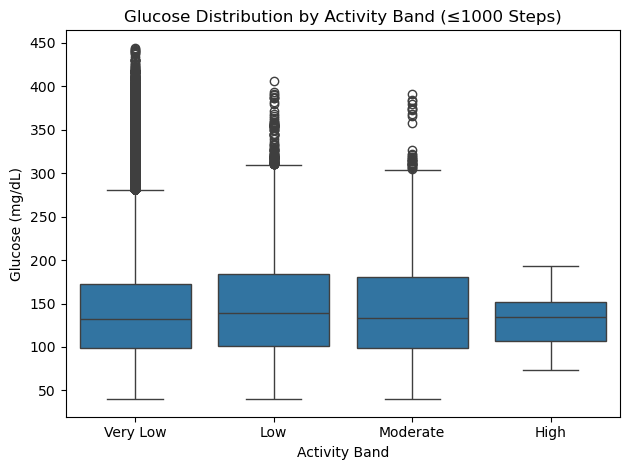

Activity_Band
Very Low    298534
Low           8279
Moderate      2556
High            23
Name: count, dtype: int64


In [24]:

bins = [0, 250, 500, 750, 1000]
labels = ["Very Low", "Low", "Moderate", "High"]
df["Activity_Band"] = pd.cut(df["Steps"], bins=bins, labels=labels, include_lowest=True)

sns.boxplot(x="Activity_Band", y="Glucose(mg/dL)", data=df)
plt.title("Glucose Distribution by Activity Band (≤1000 Steps)")
plt.xlabel("Activity Band")
plt.ylabel("Glucose (mg/dL)")
plt.tight_layout()
plt.show()

print(df["Activity_Band"].value_counts())




## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q4. What percentage of patients experience sleep disturbances, and how does that relate to elevated glucose readings?</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">
    
<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>

Why these markers:
Sleep Disturbances impair hormonal balance and glucose regulation.
Glucose reveals the metabolic impact.

Clinical importance: Sleep disturbances are a modifiable risk factor. Linking them to glucose levels supports behavioral interventions and highlights the need for sleep hygiene in diabetes care.

No Sleep Disturbances      18.852786
With Sleep Disturbances    22.105280
Name: high_glucose, dtype: float64


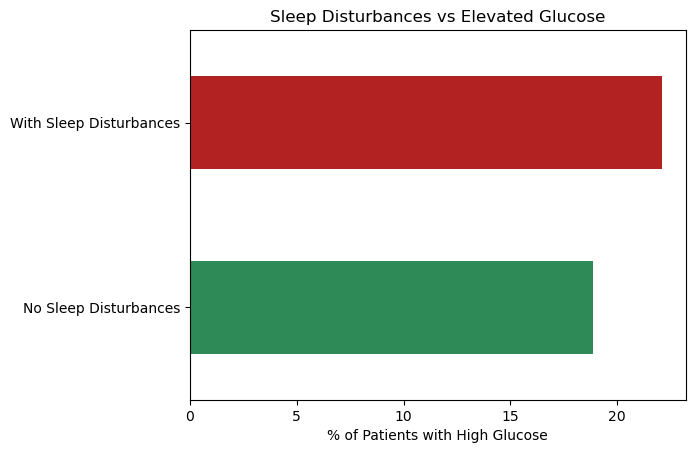

In [26]:

# Create a binary flag: 1 if sleep disturbance >= 50%, else 0
df["sleep_disturbance_flag"] = (df["% with Sleep Disturbances"] >= 50).astype(int)

# Calculate high glucose flag
df["high_glucose"] = (df["Glucose(mg/dL)"] > 180).astype(int)

# Group and calculate percentage with high glucose
result = df.groupby("sleep_disturbance_flag")["high_glucose"].mean() * 100

# Relabel index for readability
result.index = ["No Sleep Disturbances", "With Sleep Disturbances"]

print(result)

result.plot(kind="barh", color=["seagreen","firebrick"])
plt.xlabel("% of Patients with High Glucose")
plt.title("Sleep Disturbances vs Elevated Glucose")
plt.show()


## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q5.What is the percentage of male and female in the given dataset?
</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>
Hormones such as estrogen, can affect the immune system and islet cell function, potentially offering protection against the development of Type 1 Diabetes, especially in females.


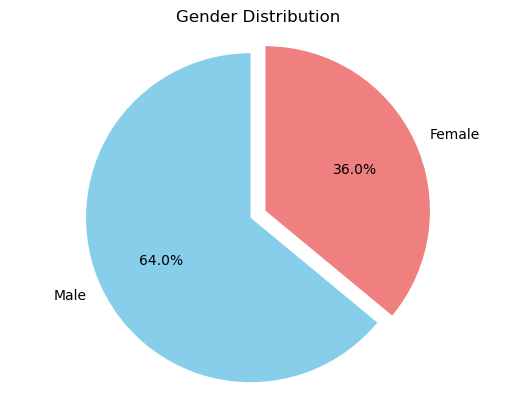

In [28]:

df = demographics.copy()
gender_percentages = df['Gender'].value_counts(normalize=True) * 100


labels = ['Male', 'Female']
sizes = [(gender_percentages['Male']), (gender_percentages['Female'])] 

# Customization options
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Add a title
plt.title('Gender Distribution')

# Ensure the pie chart is circular
plt.axis('equal')

# Display the chart
plt.show()


## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q6.What is the trend of patients’ average heart rate on a day-to-day basis
</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>
For individuals with type 1 diabetes, an elevated resting heart rate can be a sign of cardiovascular autonomic neuropathy (CAN), a complication of diabetes, and may indicate a higher risk of future cardiovascular events

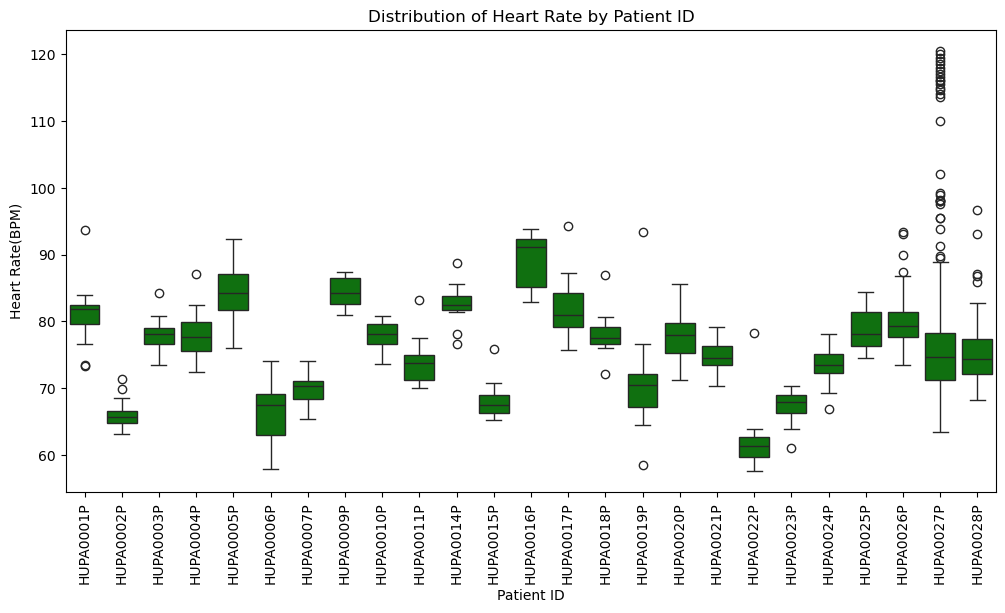

In [30]:
df = pd.read_csv(patients_file)
df_split_time = df['DateTime'].str.split(' ', expand = True)
df_split_time.columns = ['Date','Timestamp']
df = pd.concat([df,df_split_time], axis=1)

#Calculating average heart rate for each patients
Heart_Rate = df.groupby(['Patient_ID','Date'] )['Heart Rate(BPM)'].mean().reset_index()


#Creating boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=Heart_Rate['Patient_ID'], y=Heart_Rate['Heart Rate(BPM)'], data=Heart_Rate, color='green')
plt.title('Distribution of Heart Rate by Patient ID')
plt.xlabel('Patient ID')
plt.xticks(rotation=90) 
plt.ylabel('Heart Rate(BPM)')
#plt.grid(axis='y', alpha=0.7)
plt.show()


## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q7.What does the descriptive analysis (df.describe()) reveal about patients’ age, sleep duration, sleep quality, and sleep disturbances? 
</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>

The descriptive statistics reveal that patients generally sleep less with moderate quality and frequent disturbances, highlighting potential risks for chronic disease and underscoring the need for better sleep management strategies.


             Age  Average Sleep Duration (hrs)  Sleep Quality (1-10)  \
count  25.000000                       25.0000             25.000000   
mean   46.680000                        5.9720              5.952000   
std    15.544881                        0.6699              1.342609   
min    20.000000                        5.0000              4.100000   
25%    34.000000                        5.4000              4.600000   
50%    46.000000                        5.9000              5.900000   
75%    62.000000                        6.6000              7.100000   
max    74.000000                        7.2000              7.900000   

       % with Sleep Disturbances  
count                  25.000000  
mean                   52.800000  
std                    17.682383  
min                    30.000000  
25%                    40.000000  
50%                    50.000000  
75%                    70.000000  
max                    80.000000  


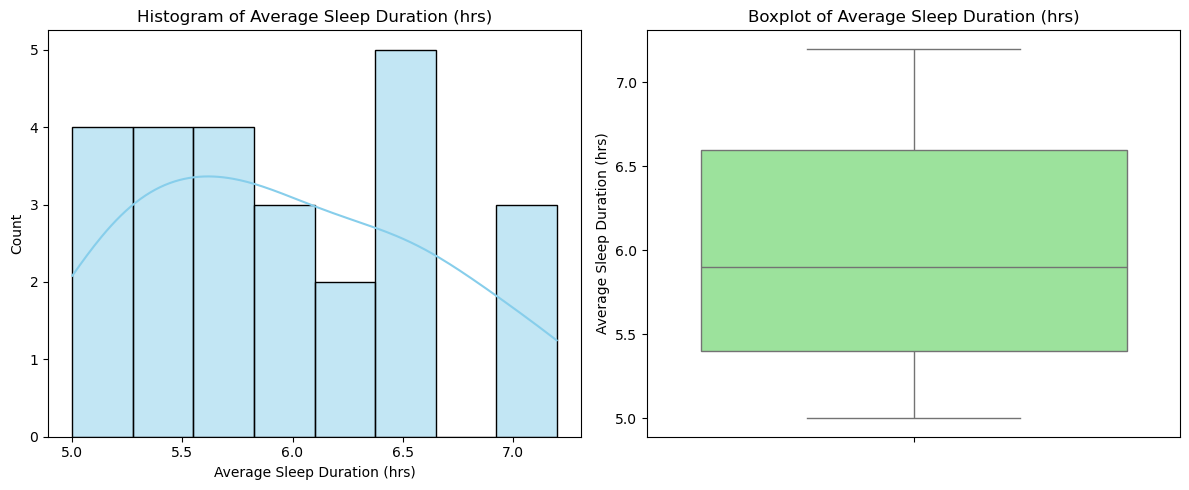

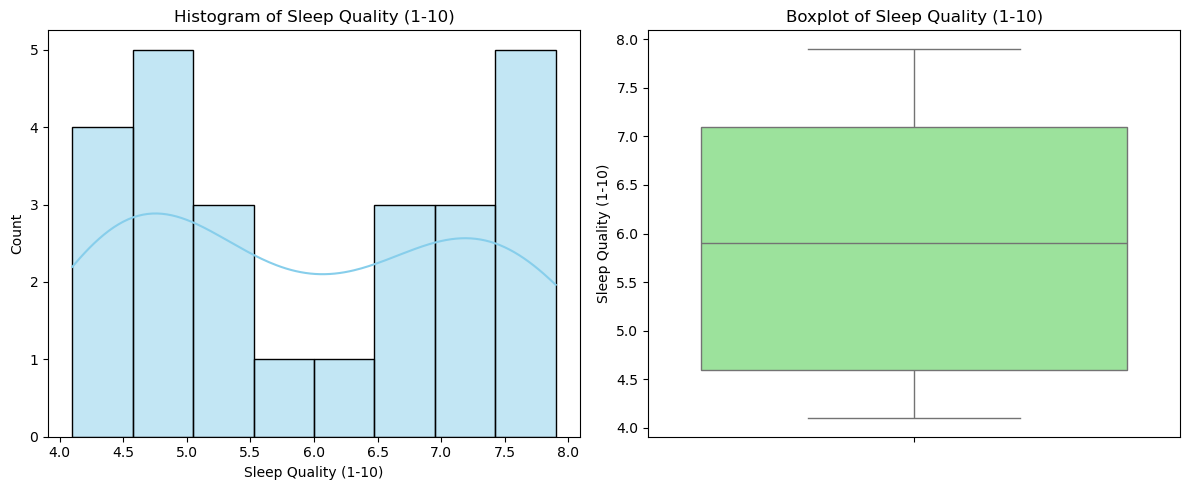

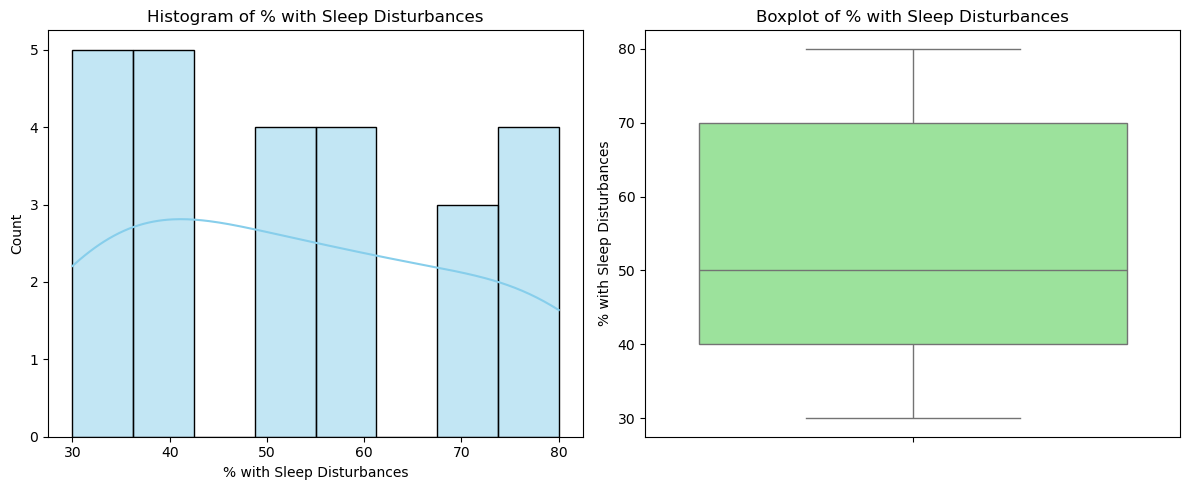

In [32]:

df_demographics = demographics.copy()
print(df_demographics.describe())
variables = ["Average Sleep Duration (hrs)", "Sleep Quality (1-10)", "% with Sleep Disturbances"]

for var in variables:
    plt.figure(figsize=(12,5))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_demographics[var], kde=True, bins=8, color='skyblue')
    plt.title(f'Histogram of {var}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df_demographics[var], color='lightgreen')
    plt.title(f'Boxplot of {var}')
    
    plt.tight_layout()
    plt.show()

## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q8. Are there specific time windows where glucose spikes are more frequent, and how do they relate to carb input?
</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>

(Glucose Spikes vs Carb Intake by Hour):

Glucose spikes were defined as readings >180 mg/dL.

When analyzed by hour, the highest spike frequency (~26%) occurred in the evening (7–9 PM), which coincides with higher carb intake from dinner.

Moderate spikes were also seen after breakfast (8–10 AM) and lunch (12–1 PM), aligning with mealtime carb intake.

The lowest spike frequency (~15%) was in mid-afternoon (2–3 PM), when carb intake is minimal.

Glucose spikes are most frequent in the evening after dinner, less frequent mid-afternoon, and follow a clear meal-related pattern.

I analyzed glucose spikes by hour of day, found they peak in the evening (7–9 PM) when carb intake is highest, and used a combined bar-line chart to show how spike frequency and average carbs align with mealtimes—revealing clear patterns that can guide insulin timing and meal planning.

🔍 Insight You Can Highlight
The data showed that glucose spikes are most frequent after dinner, with moderate spikes after breakfast and lunch, and the lowest spike rate in mid-afternoon when carb intake is minimal—confirming that spikes follow a predictable meal-related pattern.

🧠 How You Built the Interactive Chart
I used Matplotlib with Seaborn to create a dual-axis plot: a bar chart for average carb intake and a line chart for spike frequency. This layout makes it easy to compare how food intake and glucose responses vary across the day, helping clinicians or patients adjust insulin or meal timing.

    Hour  Spike_Freq  Avg_Carb  Spike_Freq(%)
0      0    0.219280  0.004361          21.93
1      1    0.184796  0.002179          18.48
2      2    0.184641  0.002723          18.46
3      3    0.198724  0.000934          19.87
4      4    0.213119  0.000545          21.31
5      5    0.214908  0.006458          21.49
6      6    0.202614  0.003190          20.26
7      7    0.195923  0.084656          19.59
8      8    0.188920  0.081310          18.89
9      9    0.196390  0.087146          19.64
10    10    0.240274  0.034392          24.03
11    11    0.257683  0.023030          25.77
12    12    0.216590  0.025344          21.66
13    13    0.159163  0.157919          15.92
14    14    0.150954  0.156536          15.10
15    15    0.189451  0.104330          18.95
16    16    0.200386  0.026476          20.04
17    17    0.203472  0.034028          20.35
18    18    0.236864  0.019906          23.69
19    19    0.265818  0.040741          26.58
20    20    0.266543  0.082001    

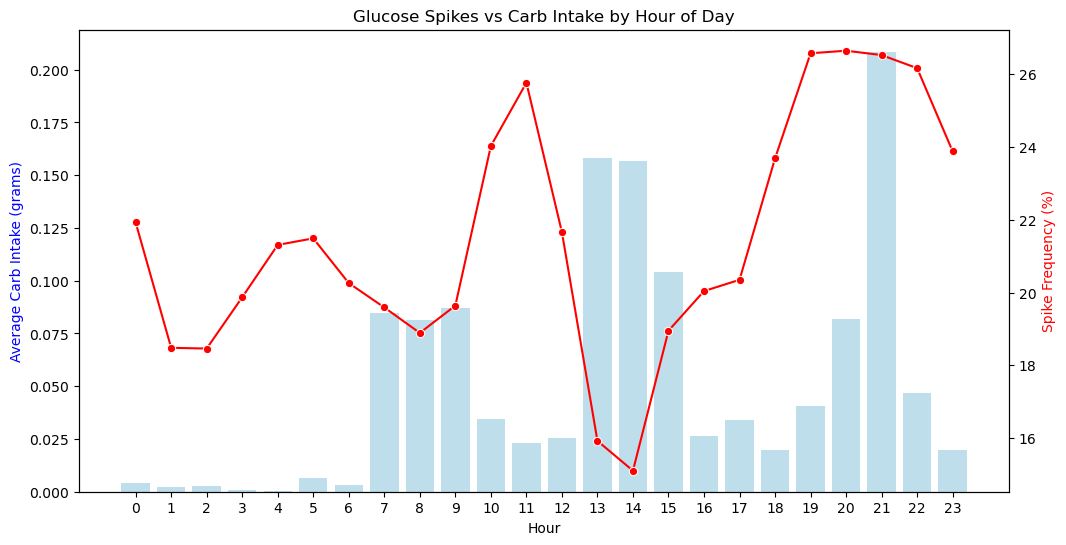

In [34]:

# 1. Extract hour of day
final_df["Hour"] = final_df["DateTime"].dt.hour

# 2. Define glucose spike (threshold >180)
final_df["Glucose_Spike"] = (final_df["Glucose(mg/dL)"] > 180).astype(int)

# 3. Aggregate by hour: % spikes and avg carbs
time_summary = final_df.groupby("Hour").agg(
    Spike_Freq=("Glucose_Spike", "mean"),   # proportion of readings that are spikes
    Avg_Carb=("Carb Intake (grams)", "mean")
).reset_index()

# Convert spike frequency to %
time_summary["Spike_Freq(%)"] = (time_summary["Spike_Freq"] * 100).round(2)

print(time_summary)

# 4. Plot spikes and carb intake across hours
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for carb intake
sns.barplot(x="Hour", y="Avg_Carb", data=time_summary, color="skyblue", ax=ax1, alpha=0.6)
ax1.set_ylabel("Average Carb Intake (grams)", color="blue")

# Line plot for spike frequency
ax2 = ax1.twinx()
sns.lineplot(x="Hour", y="Spike_Freq(%)", data=time_summary, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Spike Frequency (%)", color="red")

plt.title("Glucose Spikes vs Carb Intake by Hour of Day")
plt.show()



## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q9.What is the average daily step count per patient?
</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>
 Physical activity improves insulin sensitivity. Looking at average steps shows lifestyle impact.

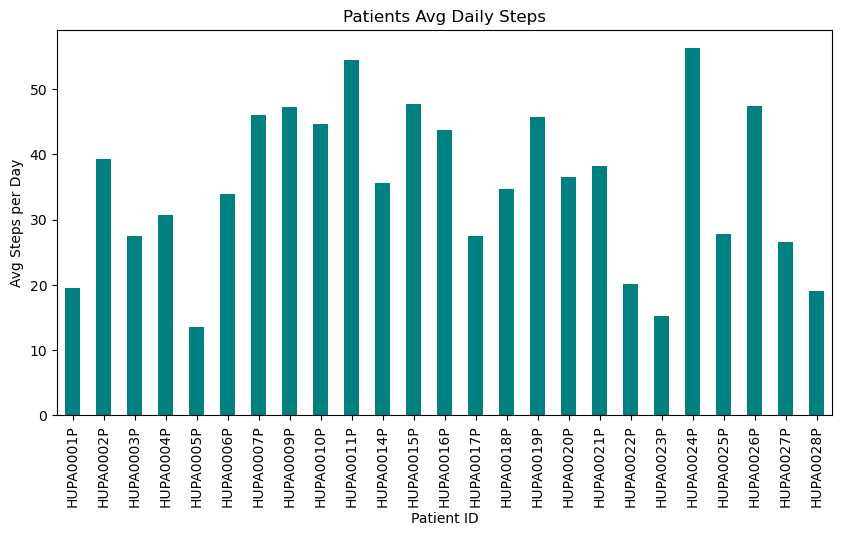

In [36]:
#final_df['Date'] = final_df['DateTime'].dt.date
daily_steps = final_df.groupby(['Patient_ID','DateTime'])['Steps'].sum().reset_index()
avg_daily_steps = daily_steps.groupby('Patient_ID')['Steps'].mean()
#print(avg_daily_steps.head())

plt.figure(figsize=(10,5))
avg_daily_steps.plot(kind='bar', color='teal')
plt.title("Patients Avg Daily Steps")
plt.xlabel("Patient ID")
plt.ylabel("Avg Steps per Day")
plt.show()


## <div style="color:darkred; font-family:'Arial',sans-seriff;font-size:26px;"><b>Q10.How do glucose levels vary across age groups with respect to bolus volume delivered?

</b></div>

<div style="color:black; font-size:18px; margin-bottom:0px;">

<h1 style="font-size:24px; font-weight:bold; margin:0 0 10px 0;">Reasoning:</h1>
Glucose control is highly variable across all age groups, indicating a need for personalized insulin management.<br>
Middle-aged (30–50) patients seem to get more aggressive insulin therapy.<br>
Older patients (50+, 80+) get smaller doses but still often show higher glucose, possibly due to cautious dosing strategies.<br>


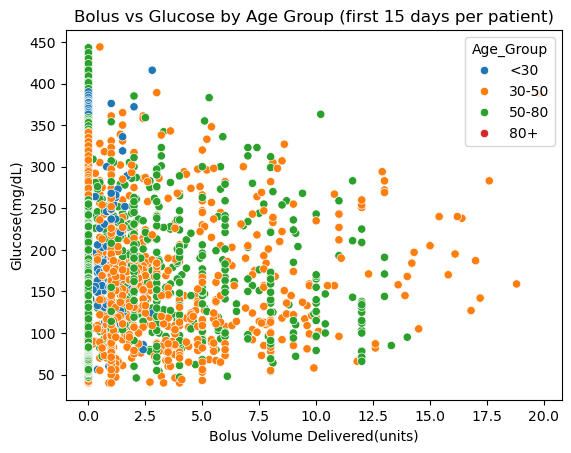

In [38]:
df_merged = pd.merge(final_df, demographics, on='Patient_ID', how='left')

# Convert DateTime
df_merged['DateTime'] = pd.to_datetime(df_merged['DateTime'])
df_merged['date'] = df_merged['DateTime'].dt.date

# Sort by patient + date
df_merged = df_merged.sort_values(['Patient_ID', 'DateTime'])


# For each patient, keep only first 15 unique days
df_limited = (
    df_merged.groupby('Patient_ID')
    .apply(lambda x: x[x['date'].isin(sorted(x['date'].unique())[:15])])
    .reset_index(drop=True)
)
bins = [0, 30, 50, 80, 120]   # adjust upper limit as needed
labels = ["<30", "30-50", "50-80", "80+"]
df_limited['Age_Group'] = pd.cut(df_limited['Age'], bins=bins, labels=labels, right=False)
# Now plot using truncated dataset
sns.scatterplot(
    x='Bolus Volume Delivered(units)',
    y='Glucose(mg/dL)',
    hue='Age_Group',
    data=df_limited
)
plt.title("Bolus vs Glucose by Age Group (first 15 days per patient)")
plt.show()